In [211]:
# coding: utf-8
import pandas as pd
from math import log
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
%matplotlib inline

## Job
### Loading the dataframes

Fill dict `df_dict` with dataframes with keys: *book_name*, e.g. *aubonheurdesdames_gender_nosolo*

In [212]:
books = ['aubonheurdesdames', 'candide', 'lassommoir', 'letourdumondeen80jours', 'madamebovary']
gender_names = ['gender_nosolo', 'gender_solo']
sentiment_names = ['sentiment_nosolo', 'sentiment_solo']
job_names = ['count_full_const', 'count_full_decr', 'count_expo_const', 'count_expo_decr', 
            'proximity_full_const', 'proximity_full_decr', 'proximity_expo_const', 'proximity_expo_decr',
            'job_full_const', 'job_full_decr', 'job_expo_const', 'job_expo_decr']
frame_names = job_names + gender_names# + sentiment_names
suffix = '.csv'
path = 'metadata/'
pred_col = ['count', 'proximity']


df_dict = {}
for b in books:
    for name in frame_names:
        file = path + b + '_' + name + suffix 
        key = b + '_' + name
        df_dict[key] = pd.read_csv(file)
        df_dict[key].drop('Unnamed: 0', axis=1, inplace=True)
        
        predictor = name.split('_')[0]
        if predictor in pred_col:
            df_dict[key]['Predictor'] = predictor
        

In [213]:
gender_cols = df_dict['aubonheurdesdames_gender_nosolo'].columns
job_cols = df_dict['aubonheurdesdames_count_full_const'].columns
# sentiment_cols = df_dict['letourdumondeen80jours_sentiment_nosolo'].columns

In [214]:
palette = sns.color_palette()
sns.set_style('whitegrid')

## Job predictor choice
How to choose predictor
- highest rank predictions score higher than high rank predictions of other predictors?

In [151]:
def char_similarity(df, name='', character=''):
    if name:
        # Use mean of col 
        df = df_dict[name]
        df = df.fillna(df.mean())
    if character:
        df = df[df.Character == character]
        
    df = df.groupby(['Rank'])['Similarity'].mean().to_frame()
        
    return df

### WINDOW = 5

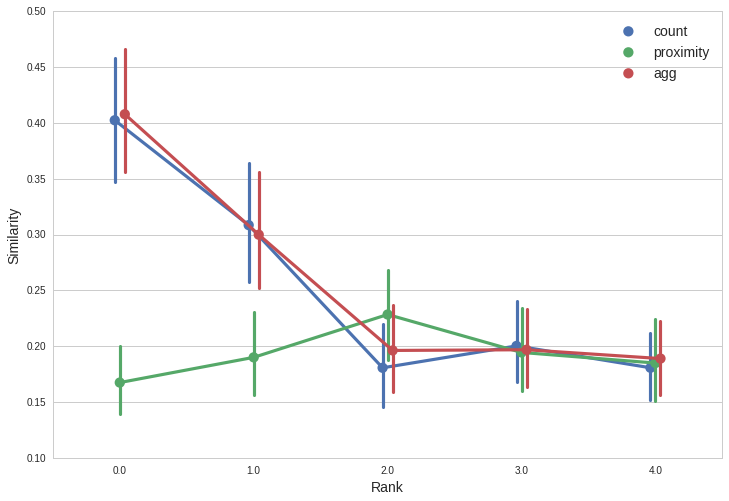

In [165]:
df1 = pd.DataFrame(columns=job_cols)
df2 = pd.DataFrame(columns=job_cols)
df3 = pd.DataFrame(columns=job_cols)
plot_names = ['_count_full_decr', '_proximity_full_decr', '_job_full_decr']

for book in books: 
    df1 = df1.append(df_dict[book+plot_names[0]])
    df2 = df2.append(df_dict[book+plot_names[1]])
    df3 = df3.append(df_dict[book+plot_names[2]])

df1 = df1.fillna(df1.mean())
df2 = df2.fillna(df2.mean())
df3 = df3.fillna(df3.mean())

df = df1.append(df2)
df = df.append(df3)

fig, ax = plt.subplots(figsize=(12,8))

sns.pointplot(x='Rank', y="Similarity", hue="Predictor", data=df, dodge=True)
ax.legend(fontsize=14)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Similarity', fontsize=14);

In [171]:
len(df.Character.unique())

108

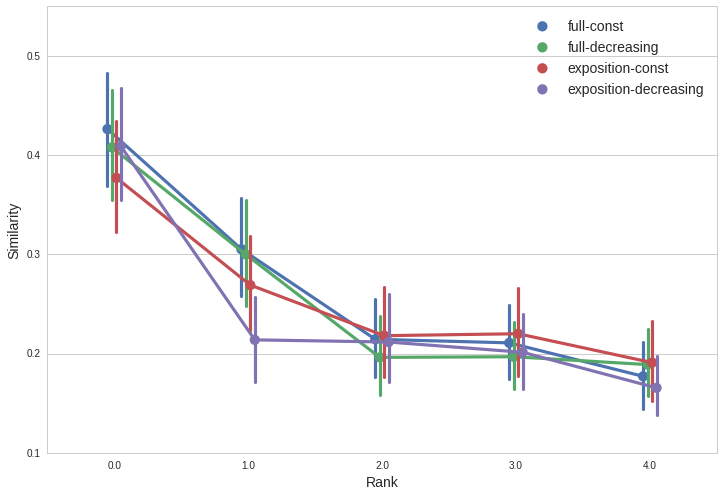

In [206]:
df1 = pd.DataFrame(columns=job_cols)
df2 = pd.DataFrame(columns=job_cols)
df3 = pd.DataFrame(columns=job_cols)
df4 = pd.DataFrame(columns=job_cols)
plot_names = ['_job_full_const','_job_full_decr', '_job_expo_const', '_job_expo_decr']

for book in books: 
    df1 = df1.append(df_dict[book+plot_names[0]])
    df2 = df2.append(df_dict[book+plot_names[1]])
    df3 = df3.append(df_dict[book+plot_names[2]])
    df4 = df4.append(df_dict[book+plot_names[3]])


df1 = df1.fillna(df1.mean())
df2 = df2.fillna(df2.mean())
df3 = df3.fillna(df3.mean())
df4 = df4.fillna(df4.mean())


df1['Predictor'] = 'full-const'
df2['Predictor'] = 'full-decreasing'
df3['Predictor'] = 'exposition-const'
df4['Predictor'] = 'exposition-decreasing'


df = df1.append(df2)
df = df.append(df3)
df = df.append(df4)

fig, ax = plt.subplots(figsize=(12,8))

sns.pointplot(x='Rank', y="Similarity", hue="Predictor", data=df, dodge=True)

ax.legend(fontsize=14)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Similarity', fontsize=14);

In [207]:
df1 = df1[df1.Rank < 5]
len(df1[df1.Similarity == 1.0].Character.unique())

77

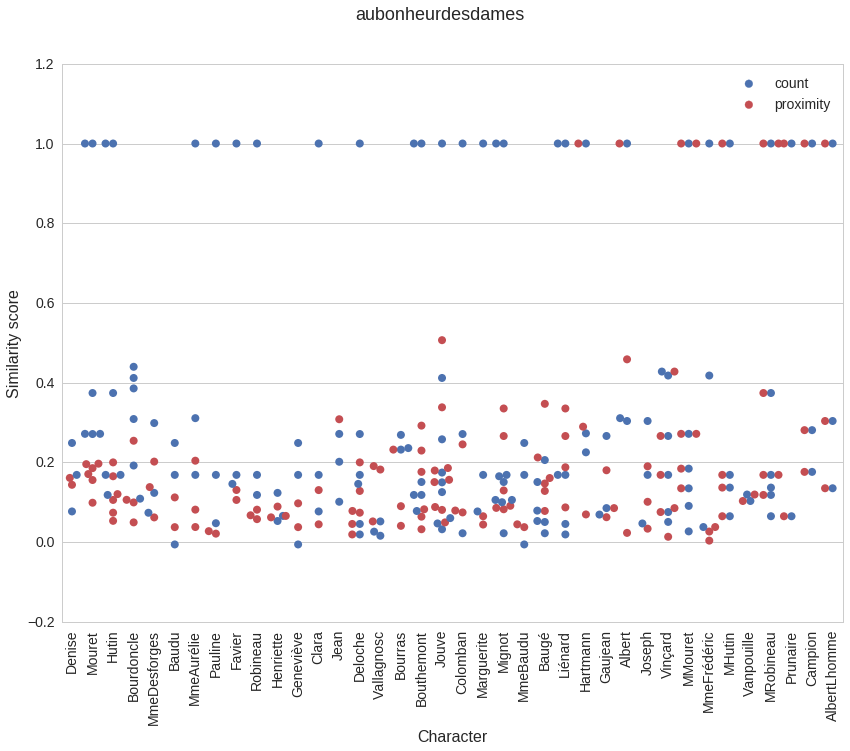

In [173]:
book = 'aubonheurdesdames'
name1 = book + '_count_full_const'
name2 = book + '_proximity_full_const'

plotter = df_dict[name1].append(df_dict[name2])
plotter = plotter[plotter.Rank < 3]
fig, ax = plt.subplots(figsize=(14,10))

sns.swarmplot(
    x='Character',
    y='Similarity',
    hue='Predictor',
    palette={'count': palette[0], 'proximity': palette[2]},
    data=plotter,
    ax=ax, 
    size=8)
plt.xticks(rotation=90)
plt.suptitle(book, fontsize=18)
ax.legend(
   loc='best',
   fontsize=14)
ax.tick_params(labelsize=14)
plt.xlabel('Character', fontsize=16)
plt.ylabel('Similarity score', fontsize=16)
plt.show()

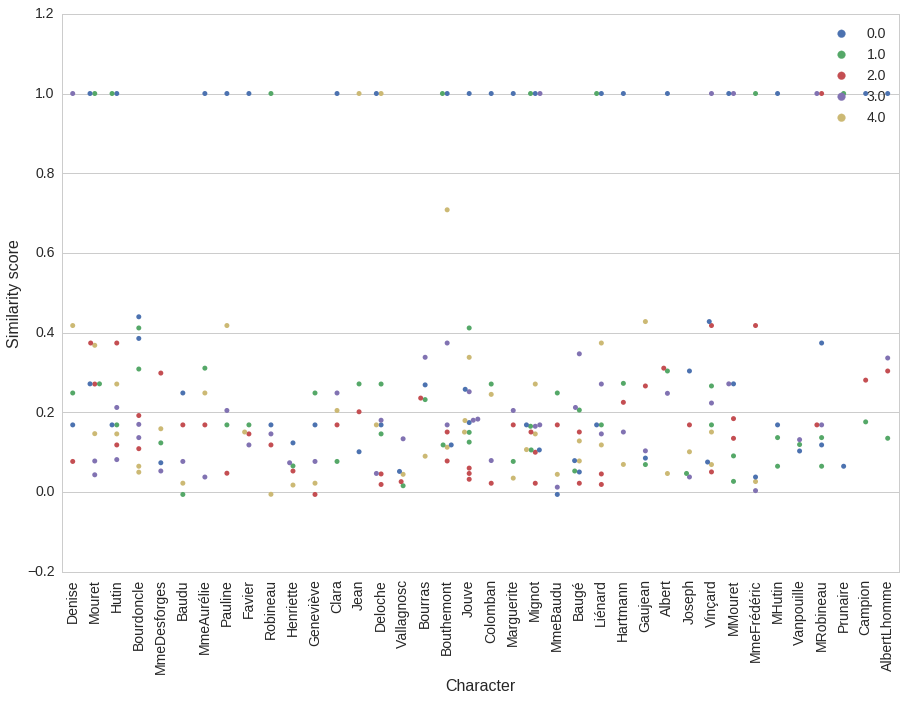

In [82]:
fig, ax = plt.subplots(figsize=(15,10))
book = 'aubonheurdesdames'
name = book + '_count_full_const'
sns.swarmplot(
    x='Character',
    y='Similarity',
    data=df_dict[name],
    hue='Rank',
    ax=ax)
ax.legend(
   loc='best',
   fontsize=14)
ax.tick_params(labelsize=14)
plt.xlabel('Character', fontsize=16)
plt.ylabel('Similarity score', fontsize=16)
plt.xticks(rotation=90)
plt.show()

## Gender

In [216]:
df_gender = pd.DataFrame(columns=gender_cols)
for book in books:
    for name in gender_names:
        df_key = book + '_' + name
        df_gender = df_gender.append(df_dict[df_key])
        
y = df_gender.Label
df_gender.drop('Label', axis=1, inplace=True)
y = y.apply(lambda x: 0 if x == 'f' else 1 ) 
df_gender.drop('Character', axis=1, inplace=True)

In [217]:
scaler = StandardScaler()

df_gender = scaler.fit_transform(df_gender)

In [218]:
lr_cv = LogisticRegression(max_iter=3000)

model = lr_cv.fit(df_gender, y)
model.coef_

array([[-0.23596261, -1.29946189, -2.82112335, -0.95352382, -0.21066797,
         0.66336728, -0.84280897, -0.32153325, -0.74339981,  0.15605652,
         0.23342726, -0.14142894]])

In [219]:
df_joined_gend_preds = {}
for book in books:
    df_joined_gend_preds[book] = df_dict[book + '_' + gender_names[0]].join(
                    df_dict[book + '_' + gender_names[1]], lsuffix='_nosolo', rsuffix='_solo')
    
df_append_gender = pd.DataFrame(columns=df_joined_gend_preds['candide'].columns)
for k, v in df_joined_gend_preds.items():
    df_append_gender = df_append_gender.append(v)
        
y = df_append_gender.Label_nosolo 
df_append_gender.drop(['Label_nosolo', 'Label_solo'], axis=1, inplace=True)
df_append_gender.drop(['Character_nosolo', 'Character_solo'], axis=1, inplace=True)

y = y.apply(lambda x: 0 if x == 'f' else 1 ) 
 

In [220]:
df_append_gender.columns

Index(['Title_score_nosolo', 'Title_score_div_nosolo', 'Title_in_name_nosolo',
       'Adj_score_nosolo', 'Adj_score_div_nosolo', 'Pron_score_nosolo',
       'Pron_score_div_nosolo', 'Mention_count_nosolo', 'Book_length_nosolo',
       'Span_nosolo', 'Interaction_count_nosolo', 'Char_count_nosolo',
       'Title_score_solo', 'Title_score_div_solo', 'Title_in_name_solo',
       'Adj_score_solo', 'Adj_score_div_solo', 'Pron_score_solo',
       'Pron_score_div_solo', 'Mention_count_solo', 'Book_length_solo',
       'Span_solo', 'Interaction_count_solo', 'Char_count_solo'],
      dtype='object')

In [221]:
df_append_gender = scaler.fit_transform(df_append_gender)

In [222]:
model = lr_cv.fit(df_append_gender, y)
model.coef_

array([[-0.51046895, -0.51443578, -1.57751696, -0.1185995 , -0.24774453,
         0.76673793, -1.26177243, -0.05795802, -0.33946877,  0.28670832,
         0.04858511, -0.14115025,  0.32356387, -0.91795569, -1.31437425,
        -0.8833118 , -0.39050175,  0.30411328,  0.00846231, -0.09463132,
        -0.33946877,  0.02027519,  0.04858511, -0.14115025]])